## Geometric Brownian Motion

$$dX_t=\mu X_tdt+\sigma X_tdW_t$$

where $\mu$, $\sigma\in\mathbb{R}$ and $W_t-W_s\sim\mathcal{N}(0, t-s)$.

### Discrete Approximation of Brownian Motion

We will use a Euler discretisation for the simulation.

$$X_{t+1}=X_t+\mu X_t dt+\sigma X_tdW_t$$

$$
dW_t \sim N(0, dt)
$$

Note
$$
W_t = W_{t-1} + dW_t, \quad \text{where } dW_t \sim N(0, dt).
$$
or
$$
W_t = \sum_{i=1}^n dW_i,
$$

so
$$
\text{Var}(W_t) = n \cdot dt
$$

### In continuous-time process
$$
\mathbb{E}[W_t^2] = \text{Var}(W_t) = T
$$

This means if we set dt = 0.01, and simulate for n = 100 timestamps, this is equivalent to T = 1 year in Black-Scholes




### Black-Scholes

$$
d_1 = \frac{\ln(S / K) + (r + 0.5 \sigma^2) T}{\sigma \sqrt{T}}
$$

For call:
$$
\Delta = N(d1)
$$

For put:
$$
\Delta = N(d1) - 1
$$

Gamma:
$$
\Gamma = \frac{\phi(d_1)}{S \sigma \sqrt{T}}
$$

In [1]:
from base import GBM, Option
import torch
import matplotlib.pyplot as plt

mu, sig = 0.02, 0.15
x0, strike = 1.0, 1.0
dt, T = 0.01, 1.0

In [2]:
call = Option(mu, sig, x0, strike, dt = 0.01, n_paths=100000, option_type='Call', device='cuda')
call.simulate()
call.compute_payoff()
print('price', call.price)
print('delta', call.compute_delta())

Simulation done
price 0.06985085465508467
delta 0.5951619148254395


In [3]:
call.black_scholes(print_=True)

price:  0.06961840391159058
Delta:  0.5825156569480896
Gamma:  2.6025195121765137


0.06961840391159058

Too many paths to plot. Plotting first 1000 paths


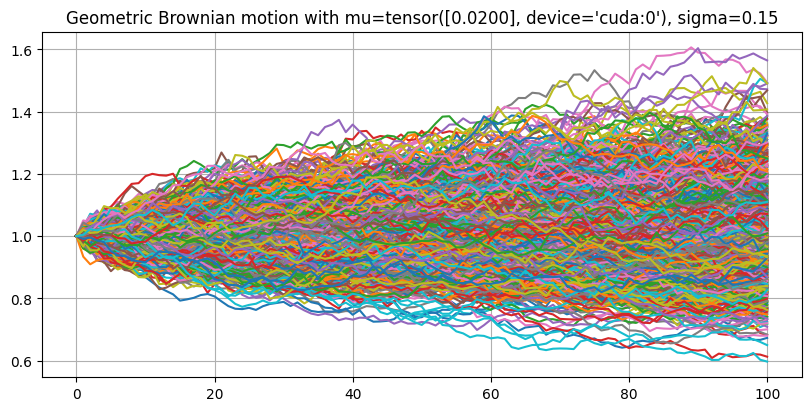

In [4]:
call.plot()

Simulation done
Simulation done
Simulation done
Simulation done
Simulation done
Simulation done
Simulation done


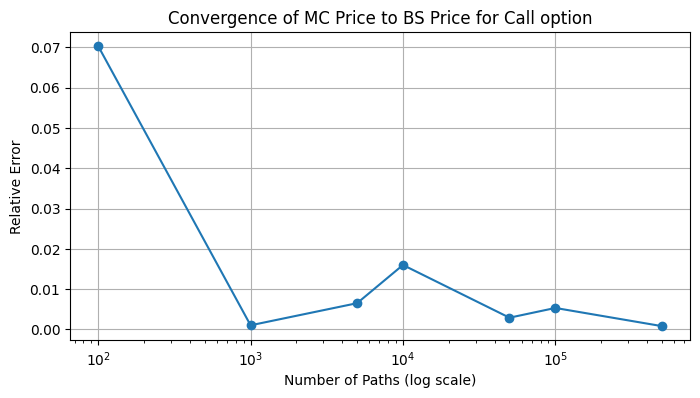

In [5]:
n_paths_values = [int(x) for x in [100, 1000, 5000, 10000, 50000, 1e5, 5e5]]
call.plot_accuracy(n_paths_values)

Simulation done
Simulation done
Simulation done
Simulation done
Simulation done
Simulation done
Simulation done


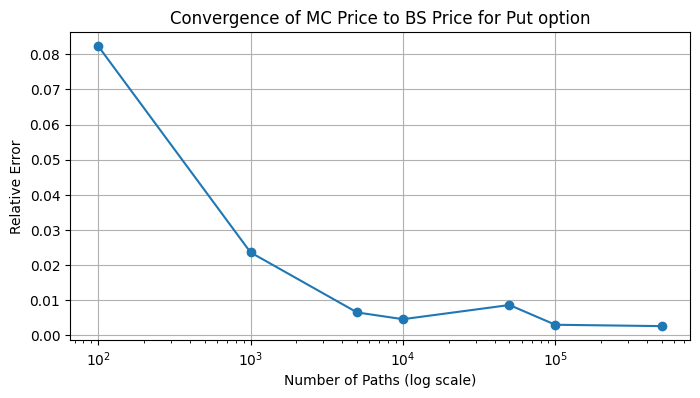

In [6]:
put = Option(mu, sig, x0, strike, dt = 0.01, n_paths=1000, option_type='Put', device='cuda')
put.plot_accuracy(n_paths_values)

BS Delta:  0.5825156569480896
Simulation done
MC Delta:  0.6192039847373962
Simulation done
MC Delta:  0.5774345397949219
Simulation done
MC Delta:  0.5981668829917908
Simulation done
MC Delta:  0.597444474697113
Simulation done


MC Delta:  0.5965250134468079
Simulation done
MC Delta:  0.5932795405387878
Simulation done
MC Delta:  0.5952727794647217


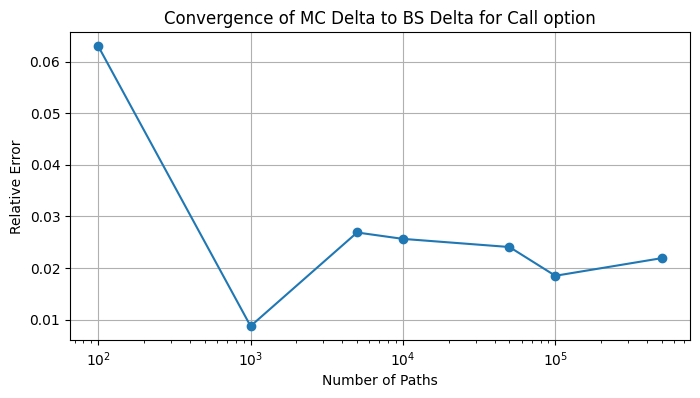

In [7]:
call.plot_delta(n_paths_values)

BS Delta:  -0.4174843430519104
Simulation done
MC Delta:  -0.4226855933666229
Simulation done
MC Delta:  -0.4362458288669586
Simulation done
MC Delta:  -0.4262937903404236
Simulation done
MC Delta:  -0.41878122091293335
Simulation done
MC Delta:  -0.4263526201248169
Simulation done
MC Delta:  -0.4263691008090973
Simulation done
MC Delta:  -0.4260958731174469


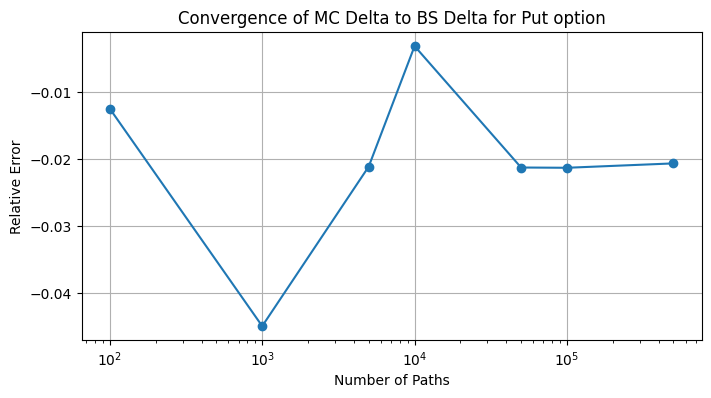

In [8]:
put.plot_delta(n_paths_values)